In [4]:
import networkx as nx
import numpy as np
from networkx.generators.random_graphs import erdos_renyi_graph, barabasi_albert_graph
import matplotlib.pyplot as plt
from tqdm import tqdm

def simulation(G, beta, gamma, starting_s):
    n = len(G.nodes)
    k = len(G.edges()) / n
    infected = np.zeros(n)
    infected[np.random.choice(np.arange(infected.shape[0]), size=starting_s, replace=False)] = 1
    timestamp = 0
    while True:
        for node in range(n):
            if infected[node] == 0:
                for edge in G.edges(node):
                    if infected[edge[1]] == 1 and np.random.rand() < beta:
                        infected[node] = 1
                        break
        for node in range(n):
            if infected[node] > 0 and np.random.rand() < gamma:
                infected[node] = 0

        color_map = ['red' if infected[node] == 1.0 else 'blue' for node in range(n)]
        pos = nx.spring_layout(G, seed=42)
        plt.clf()
        np.random.seed(42)
        nx.draw(G, node_color=color_map, pos=pos, node_size=10, width=0.15)
        plt.pause(0.1)
    
        timestamp += 1
        if timestamp == 100:
            return np.sum(infected) / n



100%|██████████| 7/7 [01:38<00:00, 14.10s/it]


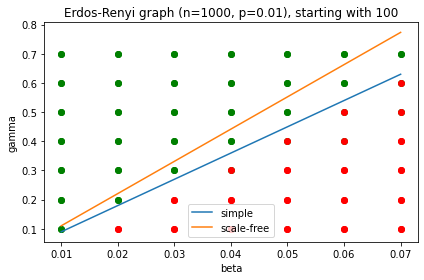

In [2]:
n = 1000
p = 0.01
starting_s = 100
G = erdos_renyi_graph(n=n, p=p)
mean_degree = np.mean([d[1] for d in G.degree])
mean_squared_degree = np.mean([d[1]*d[1] for d in G.degree])
epi_threshold = 1/(mean_degree*(n-starting_s)/n)
better_epi_threshold = mean_degree / mean_squared_degree
betas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
plt.plot(betas, [b/epi_threshold for b in betas], label='simple')
plt.plot(betas, [b/better_epi_threshold for b in betas], label='scale-free')
for beta in tqdm(betas):
    for gamma in gammas:
        achieved_threshold = beta / gamma
        infected_share = simulation(G, beta, gamma, starting_s)
        plt.scatter([beta], [gamma], c='r' if infected_share > 0.1 else 'g')
        plt.scatter([beta], [gamma], c='r' if achieved_threshold > epi_threshold else 'g', facecolors='none')

plt.title(f"Erdos-Renyi graph (n={n}, p={p}), starting with {starting_s}")
plt.xlabel("beta")
plt.ylabel("gamma")
plt.legend()
plt.tight_layout()
plt.show()

100%|██████████| 7/7 [01:30<00:00, 12.96s/it]


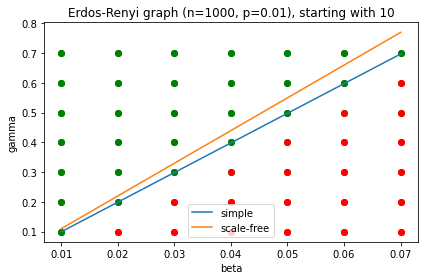

In [12]:
n = 1000
p = 0.01
starting_s = 10
G = erdos_renyi_graph(n=n, p=p)
mean_degree = np.mean([d[1] for d in G.degree])
mean_squared_degree = np.mean([d[1]*d[1] for d in G.degree])
epi_threshold = 1/(mean_degree*(n-starting_s)/n)
better_epi_threshold = mean_degree / mean_squared_degree
betas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
plt.plot(betas, [b/epi_threshold for b in betas], label='simple')
plt.plot(betas, [b/better_epi_threshold for b in betas], label='scale-free')
for beta in tqdm(betas):
    for gamma in gammas:
        achieved_threshold = beta / gamma
        infected_share = simulation(G, beta, gamma, starting_s)
        plt.scatter([beta], [gamma], c='r' if infected_share > 0.1 else 'g')
        plt.scatter([beta], [gamma], c='r' if achieved_threshold > epi_threshold else 'g', facecolors='none')

plt.title(f"Erdos-Renyi graph (n={n}, p={p}), starting with {starting_s}")
plt.xlabel("beta")
plt.ylabel("gamma")
plt.legend()
plt.tight_layout()
plt.show()

  0%|          | 0/7 [00:00<?, ?it/s]

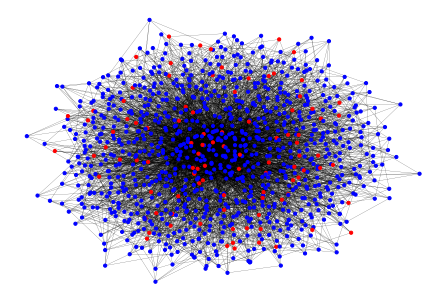

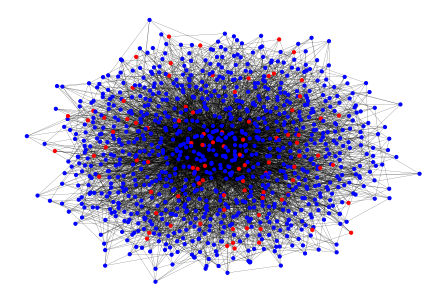

  0%|          | 0/7 [00:25<?, ?it/s]


KeyboardInterrupt: 

In [5]:
n = 1000
m = 5
starting_s = 100
G = barabasi_albert_graph(n=n, m=m)
mean_degree = np.mean([d[1] for d in G.degree])
mean_squared_degree = np.mean([d[1]*d[1] for d in G.degree])
epi_threshold = 1/(mean_degree*(n-starting_s)/n)
better_epi_threshold = mean_degree / mean_squared_degree
betas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
plt.plot(betas, [b/epi_threshold for b in betas], label='simple')
plt.plot(betas, [b/better_epi_threshold for b in betas], label='scale-free')
for beta in tqdm(betas):
    for gamma in gammas:
        achieved_threshold = beta / gamma
        infected_share = simulation(G, beta, gamma, starting_s)
        plt.scatter([beta], [gamma], c='r' if infected_share > 0.1 else 'g')
        plt.scatter([beta], [gamma], c='r' if achieved_threshold > epi_threshold else 'g', facecolors='none')

plt.title(f"Barabasi-Albert graph (n={n}, m={m}), starting with {starting_s}")
plt.xlabel("beta")
plt.ylabel("gamma")
plt.legend()
plt.tight_layout()
plt.show()

100%|██████████| 7/7 [01:35<00:00, 13.71s/it]


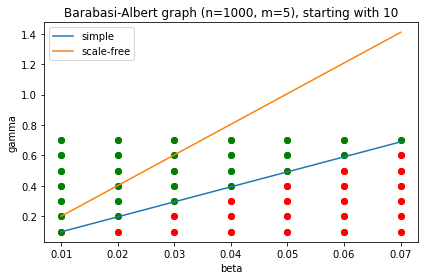

In [15]:
n = 1000
m = 5
starting_s = 10
G = barabasi_albert_graph(n=n, m=m)
mean_degree = np.mean([d[1] for d in G.degree])
mean_squared_degree = np.mean([d[1]*d[1] for d in G.degree])
epi_threshold = 1/(mean_degree*(n-starting_s)/n)
better_epi_threshold = mean_degree / mean_squared_degree
betas = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
gammas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
plt.plot(betas, [b/epi_threshold for b in betas], label='simple')
plt.plot(betas, [b/better_epi_threshold for b in betas], label='scale-free')
for beta in tqdm(betas):
    for gamma in gammas:
        achieved_threshold = beta / gamma
        infected_share = simulation(G, beta, gamma, starting_s)
        plt.scatter([beta], [gamma], c='r' if infected_share > 0.1 else 'g')
        plt.scatter([beta], [gamma], c='r' if achieved_threshold > epi_threshold else 'g', facecolors='none')

plt.title(f"Barabasi-Albert graph (n={n}, m={m}), starting with {starting_s}")
plt.xlabel("beta")
plt.ylabel("gamma")
plt.legend()
plt.tight_layout()
plt.show()